# TD 2 : ARMA PROCESS 

![CentraleSupelec Logo](https://www.centralesupelec.fr/sites/all/themes/cs_theme/medias/common/images/intro/logo_nouveau.jpg)

## But du TD : 
Trouver le modèle régissant un cours boursier :  

* 1. Load the synthetic_arma.csv and characterize the two time-series
* 2. Generate an ARMA(3,1) with T=500, $\rho = [0.7, -0.2, 0.2 ], \theta = {0.4}$  and characterize the time-series 
$$X_t = 0.7 * X_{t-1} - 0.2 * X_{t-2} + 0.2 * X_{t-3} + \epsilon_t + 0.4 * \epsilon_{t-1} $$
* 3. Generate an ARMA(3,1) with T=5000, $\rho = [0.7, -0.2, 0.2 ], \theta = {0.4}$  and characterize the time-series
$$X_t = 0.7 * X_{t-1} - 0.2 * X_{t-2} + 0.2 * X_{t-3} + \epsilon_t + 0.4 * \epsilon_{t-1} $$
* 4. Generate an ARMA(3,1) with T=500, $\rho = [0.7, -0.4, 0.4 ], \theta = {0.4}$  and characterize the time-series
$$X_t = 0.7 * X_{t-1} - 0.4 * X_{t-2} + 0.4 * X_{t-3} + \epsilon_t + 0.4 * \epsilon_{t-1} $$

In [2]:
import numpy as np 
import random as rd 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd    
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

In [1]:
__author__ = "Colleville Tanguy"
__copyright__ = "None"
__credits__ = ["None"]
__license__ = "None"
__version__ = "1.0.0"
__maintainer__ = "Colleville Tanguy"
__email__ = "tanguy.colleville@student-cs.fr"
__status__ = "Dev"

# Diapo 26 27 28 aide aux diagnostiques d'ARMA process CH2 avec ACF et PACF 

## 1. Load the synthetic_arma.csv and characterize the two time-series

In [3]:
df=pd.read_csv(r"synthetic_arma.csv")
data=df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S1      10000 non-null  float64
 1   S2      10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


In [4]:
S1=data["S1"]
S2=data["S2"]

### a. First time series

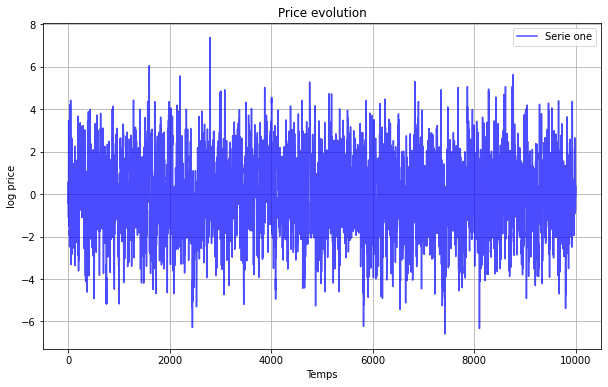

In [5]:
plt.figure(figsize=(10,6))
plt.plot(S1,c="blue",alpha=0.7,label="Serie one")
plt.title("Price evolution")
plt.xlabel("Temps")
plt.ylabel("log price")
plt.legend()
plt.grid()
plt.show()

# Attention normalement en étape préliminaire on doit check la stationnarité du cours 

In [148]:
mean_1=np.mean(S1)
var_1=np.var(S1)
print("\u03BC = ", mean_1)
print("\u03C3 ² = ",var_1)

μ =  -0.01985526697731629
σ ² =  3.0430509307907356


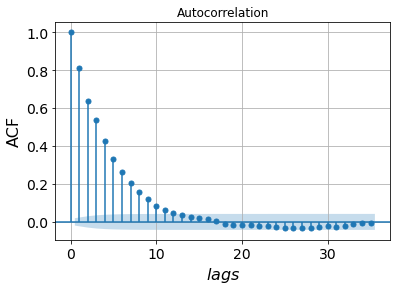

In [149]:
sm.graphics.tsa.plot_acf(S1,lags=35)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()
plt.show()

On voit que c'est statistiquement significatif jusqu'à environ 13 lags--> docn si on veut croire à une moyenne ça serait sur 13 jours glissants --> 13 params. On peut donc penser à un AR quand on voit le PACF

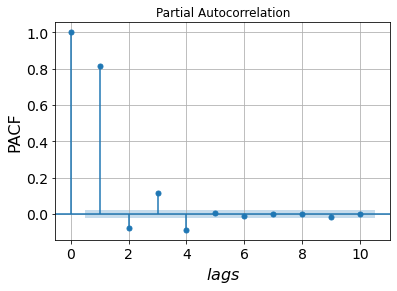

In [150]:
sm.graphics.tsa.plot_pacf(S1,lags=10)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('PACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()
# txt="""Avec ces graphiques on peut penser à un modèle AR(p). En effet, ACF est de la forme exponentielle décroissante et le PACF est de la forme d'alternance des valeurs. On voit 4 "pics" sur le PCAF ça peut être un ordre 4. ça veut dire que jusqu'à 4 lags c'est statistiquement significatif. C'est pourquoi on peut penser à un ordre 4 mais pas sécu monte jusuqu'à 6"""
# plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

#### Avec ces graphiques on peut penser à un modèle AR(p). En effet, ACF est de la forme exponentielle décroissante et le PACF est de la forme d'alternance des valeurs. On voit 4 "pics" sur le PCAF ça peut être un ordre 4. ça veut dire que jusqu'à 4 lags c'est statistiquement significatif. C'est pourquoi on peut penser à un ordre 4 mais pas sécu monte jusuqu'à 6

# Tips : ceux qui sont en dehors de la zone bleutée --> sont statistiquement signifiants 

In [151]:
models_AR=[ARMA( S1,( i , 0 )).fit( method="mle") for i in range(2,10)] ## créer des modèles AR purs p 2 à 10 

d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [152]:
p,AIC,r=np.arange(2,10,1),[],[]# r va stocker les résidus 
for index, model in enumerate(models_AR):
    print(f"p={index+2}",model.params)
    print(f"p={index+2} AIC =", model.aic)
    AIC.append(model.aic)
    r.append(model.resid)

p=2 const      -0.020318
ar.L1.S1    0.876176
ar.L2.S1   -0.076754
dtype: float64
p=2 AIC = 28603.23668567825
p=3 const      -0.020326
ar.L1.S1    0.885249
ar.L2.S1   -0.180357
ar.L3.S1    0.118225
dtype: float64
p=3 AIC = 28464.456258017693
p=4 const      -0.020274
ar.L1.S1    0.895568
ar.L2.S1   -0.196100
ar.L3.S1    0.195509
ar.L4.S1   -0.087283
dtype: float64
p=4 AIC = 28389.96590667629
p=5 const      -0.020281
ar.L1.S1    0.896155
ar.L2.S1   -0.197413
ar.L3.S1    0.196825
ar.L4.S1   -0.093297
ar.L5.S1    0.006715
dtype: float64
p=5 AIC = 28391.51484342846
p=6 const      -0.020291
ar.L1.S1    0.896230
ar.L2.S1   -0.198421
ar.L3.S1    0.198944
ar.L4.S1   -0.095424
ar.L5.S1    0.016379
ar.L6.S1   -0.010780
dtype: float64
p=6 AIC = 28392.35318030534
p=7 const      -0.020291
ar.L1.S1    0.896231
ar.L2.S1   -0.198423
ar.L3.S1    0.198959
ar.L4.S1   -0.095455
ar.L5.S1    0.016409
ar.L6.S1   -0.010919
ar.L7.S1    0.000155
dtype: float64
p=7 AIC = 28394.352940658297
p=8 const      -0.02028

In [153]:
for index, model in enumerate(models_AR):
    print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                     S1   No. Observations:                10000
Model:                     ARMA(2, 0)   Log Likelihood              -14297.618
Method:                           mle   S.D. of innovations              1.011
Date:                Thu, 13 May 2021   AIC                          28603.237
Time:                        16:47:02   BIC                          28632.078
Sample:                             0   HQIC                         28612.999
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0203      0.050     -0.403      0.687      -0.119       0.078
ar.L1.S1       0.8762      0.010     87.880      0.000       0.857       0.896
ar.L2.S1      -0.0768      0.010     -7.699      0.0

In [154]:
min_AIC=np.array(AIC).min()
AIC=np.array(AIC)
AIC-=min_AIC

No handles with labels found to put in legend.


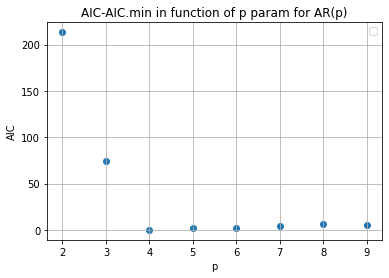

In [155]:
plt.scatter(p,AIC)
plt.ylabel("AIC")
plt.xlabel("p")
plt.title("AIC-AIC.min in function of p param for AR(p)")
plt.legend()
plt.grid()
plt.show()

#### Peut être un AR (4) ? à partir de ce qu'on voit sur AIC - AIC min c'est pour p = 4 que c'est le plus faible. On passe alors à l'inervalle de confiance

In [156]:
# resid=model.resid#c'est le résidue
# on plot le acf de resid --> si tout est dans le zone de confidence c'est un bon modele on peut regarder mais desfois c'est cho de voir si c'est bien dedans donc on fait le test du mec bizarre Ljung box 

In [157]:
# on va regarde acf pour voir si tout est bien dans la zone de secu 

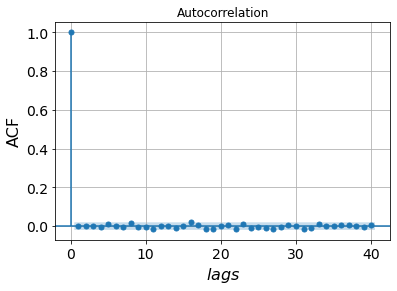

In [158]:
sm.graphics.tsa.plot_acf(r[2]) # r[2] c'est le résidu de p=4 
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()
plt.show()

In [159]:
sm.stats.acorr_ljungbox(r[2],lags=[5], model_df=4, return_df=True) # si p value faible --> on rejette le modèle
#lags c'est p+q+1

,lb_stat,lb_pvalue
5,1.125433,0.288752


### b. Time series two

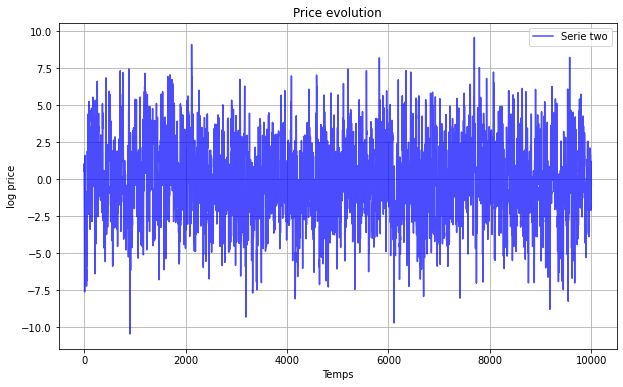

In [6]:
plt.figure(figsize=(10,6))
plt.plot(S2,c="blue",alpha=0.7,label="Serie two")
plt.title("Price evolution")
plt.xlabel("Temps")
plt.ylabel("log price")
# plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

In [7]:
mean_2=np.mean(S2)
var_2=np.var(S2)
print("\u03BC = ", mean_2)
print("\u03C3 ² = ",var_2)

μ =  -0.07892925572589121
σ ² =  6.841500824198251


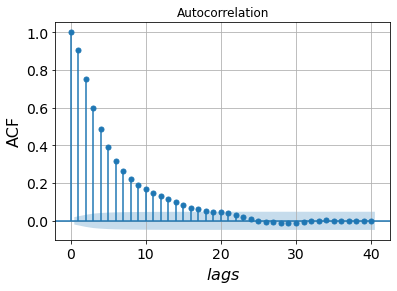

In [8]:
sm.graphics.tsa.plot_acf(S2)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()
plt.show()

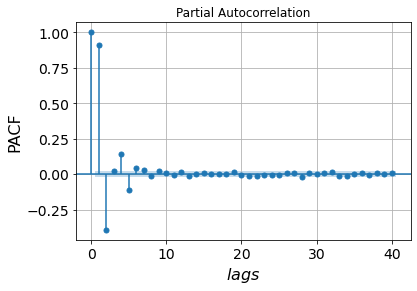

In [9]:
sm.graphics.tsa.plot_pacf(S2)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('PACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()
plt.show()

In [10]:
models_ARMA_params= [(4,0),
          (1,1),
          (2,1),
          (1,2),
          (2,2)]

In [11]:
M = {}
for p,q in models_ARMA_params:
    try:
        #Attention bien mettre la serie que tu cherches à approx par un ARMA
        ft = ARMA(S2,order=(p,q)).fit(method='mle')
        M[p,q] = ft
    except ValueError:
        print(p,q,'Maybe not stationary')

d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmo

In [15]:
AIC = pd.DataFrame( [(m,ft.aic,ft.bic) for m,ft in M.items()],columns=['model','AIC','BIC'] ) # colum 1 = param column2 = aic

AIC = AIC.assign(dAIC=(AIC.AIC-AIC.AIC.min()))
AIC = AIC.assign(dBIC=(AIC.BIC-AIC.BIC.min()))

AIC

,model,AIC,BIC,dAIC,dBIC
0,"(4, 0)",28414.807107,28458.069149,160.769807,160.769807
1,"(1, 1)",28943.027632,28971.868993,688.990332,674.569651
2,"(2, 1)",28611.079198,28647.130900,357.041898,349.831558
3,"(1, 2)",28317.021107,28353.072809,62.983807,55.773467
4,"(2, 2)",28254.037300,28297.299342,0.000000,0.000000


In [167]:
print(M.keys())

dict_keys([(4, 0), (1, 1), (2, 1), (1, 2), (2, 2)])


In [168]:
index_interet=[4,0]## 1,2 c'est xemple mais grace à AIC on met les indices des modèles qui nous intéresse
for i in index_interet:
    p,q = AIC.model[i]
    print(M[p,q].summary())

                              ARMA Model Results                              
Dep. Variable:                     S2   No. Observations:                10000
Model:                     ARMA(2, 2)   Log Likelihood              -14121.019
Method:                           mle   S.D. of innovations              0.993
Date:                Thu, 13 May 2021   AIC                          28254.037
Time:                        16:47:23   BIC                          28297.299
Sample:                             0   HQIC                         28268.681
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0790      0.084     -0.938      0.348      -0.244       0.086
ar.L1.S2       0.4973      0.031     16.037      0.000       0.436       0.558
ar.L2.S2       0.2448      0.028      8.703      0.0

In [169]:
##on regarde lesquels ont des params qui ont tous du sens : i.e. --> p values petites ou l'intervalle --> ne doit pas contenir 0 
# parmi ceux qui ont du sens on va cheick le residu pour voir si c'est bien du bruit 
# ex ; Xt= rho_1 *Xt-1 + esplion t 
#residu= Xt- rho_1*Xt--1 = epslion t 
# on esplion t on a supposé que c'es iid N(0,sigma²)--> avec le test de LjungBox on verifie si c'est bien le cas ie si la p value est grande. 

In [170]:
#p,q=the selected one according to what we saw above
p,q=2,2
r = M[p,q].resid

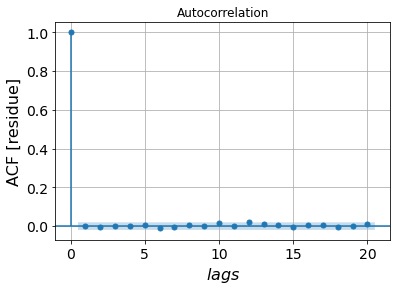

In [171]:
sm.graphics.tsa.plot_acf(r, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF [residue]',fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()
plt.show()

In [172]:
# they seems not significant, let us check with ljungbox
sm.stats.acorr_ljungbox(r,lags=[p+q+1],model_df=p+q,return_df=True)

,lb_stat,lb_pvalue
5,0.251155,0.616263


In [173]:
# The pvalue is consistent with a white noise. The model 4 can be accepted

## 2. Arma T = 500 

$$X_t = 0.7 * X_{t-1} - 0.2 * X_{t-2} + 0.2 * X_{t-3} + \epsilon_t + 0.4 * \epsilon_{t-1} $$

In [16]:
rho=np.array([0.7,-0.2,0.2]) 
theta=np.array([0.4])
p,q=3,1
ar = np.r_[1, -rho] # add zero-lag and negate
ma = np.r_[1, theta] # add zero-lag

In [17]:
np.random.seed(0)

In [176]:
help(sm.tsa.arma_generate_sample)

Help on function arma_generate_sample in module statsmodels.tsa.arima_process:

arma_generate_sample(ar, ma, nsample, scale=1, distrvs=None, axis=0, burnin=0)
    Simulate data from an ARMA.
    
    Parameters
    ----------
    ar : array_like
        The coefficient for autoregressive lag polynomial, including zero lag.
    ma : array_like
        The coefficient for moving-average lag polynomial, including zero lag.
    nsample : int or tuple of ints
        If nsample is an integer, then this creates a 1d timeseries of
        length size. If nsample is a tuple, creates a len(nsample)
        dimensional time series where time is indexed along the input
        variable ``axis``. All series are unless ``distrvs`` generates
        dependent data.
    scale : float
        The standard deviation of noise.
    distrvs : function, random number generator
        A function that generates the random numbers, and takes ``size``
        as argument. The default is np.random.standard_nor

In [18]:
# arma_process = sm.tsa.ArmaProcess(ar, ma)
# param rho puis param theta puis longeur 
Arma_s1=sm.tsa.arma_generate_sample(ar, ma, 500,burnin=100)

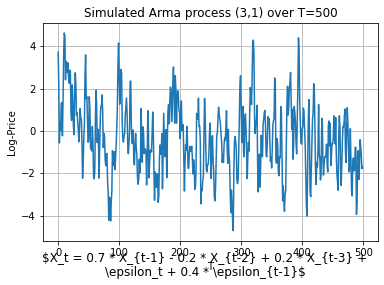

In [19]:
plt.plot(Arma_s1)
plt.grid()
plt.title("Simulated Arma process (3,1) over T=500")
txt=r"$X_t = 0.7 * X_{t-1} - 0.2 * X_{t-2} + 0.2 * X_{t-3} + \epsilon_t + 0.4 * \epsilon_{t-1}$"
plt.xlabel("T")
plt.ylabel("Log-Price")
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

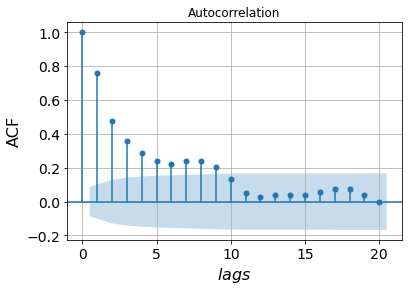

In [179]:
sm.graphics.tsa.plot_acf(Arma_s1,lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()
plt.show()

Si on veut une moyenne pure  -c'est sur une dizaine de termes 

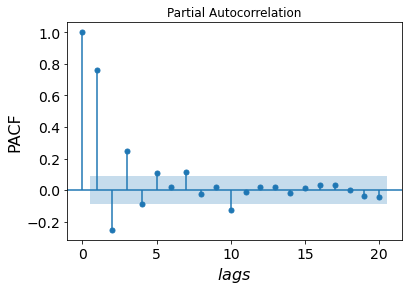

In [180]:
sm.graphics.tsa.plot_pacf(Arma_s1,lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('PACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

envrion 7 termes significatifs 

In [21]:
M = {}
models_ARMA_params=[(4,0,'n'),(4,0,'nc'),
          (1,1,'n'),(1,1,'nc'),
          (2,1,'n'),(2,1,'nc'),
          (1,2,'n'),(1,2,'nc'),
          (2,2,'n'),(2,2,'nc'),
          (3,1,'n'),(3,1,'nc')] 
for p,q,tend in models_ARMA_params:
    try:
        #fit an arma (for now without trend)
        #Attention bien mettre la serie que cherche à approximer par un ARMA ici c'est ARMA_s1 qu'on cherche à approx
        ft = ARMA(Arma_s1,order=(p,q)).fit(method='mle',trend=tend)
        M[p,q,tend] = ft
    except ValueError:
        print(p,q,'Maybe not stationary')


d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmo

In [22]:
AIC = pd.DataFrame( [(m,ft.aic,ft.bic) for m,ft in M.items()],columns=['model','AIC','BIC'] ) # colum 1 = param column2 = aic

AIC = AIC.assign(dAIC=(AIC.AIC-AIC.AIC.min()))
AIC = AIC.assign(dBIC=(AIC.BIC-AIC.BIC.min()))

AIC

,model,AIC,BIC,dAIC,dBIC
0,"(4, 0, nc)",1437.157396,1458.230436,9.428211,12.152974
1,"(1, 1, nc)",1437.347713,1449.991537,9.618528,3.914075
2,"(2, 1, nc)",1432.161382,1449.019815,4.432198,2.942353
3,"(1, 2, nc)",1429.219029,1446.077462,1.489845,0.000000
4,"(2, 2, nc)",1427.729185,1448.802225,0.000000,2.724763
5,"(3, 1, nc)",1432.923783,1453.996823,5.194598,7.919362


In [183]:
index_interet=[5,4,3]## 1,2 c'est xemple mais grace à AIC on met les indices des modèles qui nous intéresse
for i in index_interet:
    p,q,t = AIC.model[i]# p , q ,trend
    print(M[p,q,t].summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  500
Model:                     ARMA(3, 1)   Log Likelihood                -711.462
Method:                           mle   S.D. of innovations              1.003
Date:                Thu, 13 May 2021   AIC                           1432.924
Time:                        16:47:26   BIC                           1453.997
Sample:                             0   HQIC                          1441.193
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.4758      0.174      2.737      0.006       0.135       0.816
ar.L2.y        0.0641      0.193      0.332      0.740      -0.315       0.443
ar.L3.y        0.0898      0.085      1.052      0.2

In [184]:
## pour 3,1 y'a 0 dans un des intervalles c'est pas bon pareil pour 2,2

In [185]:
rs = {params: M[params].resid for params in AIC.model[index_interet]}## pour les params des modèles de ma liste d'intéret on calcule le résidu --> et les autocorelogrammes

In [186]:
# Rs est un dico ave clef param et value: la résidu série

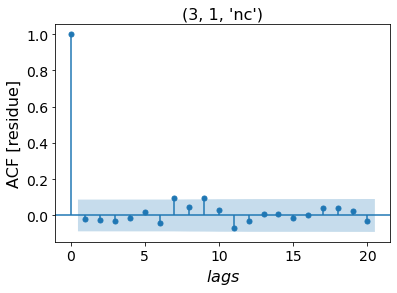

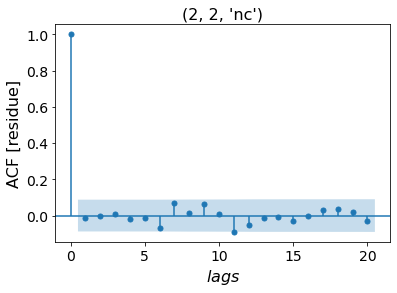

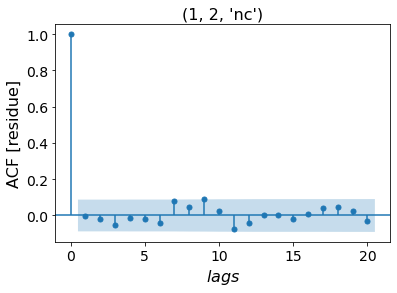

In [187]:
for params,r in rs.items():
    sm.graphics.tsa.plot_acf(r, lags=20)
    plt.xlabel(r'$lags$',fontsize=16)
    plt.ylabel('ACF [residue]',fontsize=16)
    plt.tick_params(labelsize=14)
    plt.title(params,fontsize=16)
    plt.show()

à ne juger que ça 3.1 est pas si bien le mieux semble être 2,2

In [188]:
Qtest = []  
for (p,q,trend),r in rs.items():
    pvalue = sm.stats.acorr_ljungbox(r,lags=[p+q+1],model_df=p+q,return_df=True)['lb_pvalue'][p+q+1]
    Qtest.append(( (p,q,trend), pvalue))
Qtest = pd.DataFrame( Qtest, columns=['model','residue pvalues'] )

In [189]:
Qtest

,model,residue pvalues
0,"(3, 1, nc)",0.279348
1,"(2, 2, nc)",0.513206
2,"(1, 2, nc)",0.203379


on prend donc 1,2 on a exclus le modèle qui est à l'origine de ce truc car la période d'obs était trop courte

## 3. Simulate an ARMA  with T = 5000 

$$X_t = 0.7 * X_{t-1} - 0.2 * X_{t-2} + 0.2 * X_{t-3} + \epsilon_t + 0.4 * \epsilon_{t-1} $$

In [23]:
rho=np.array([0.7,-0.2,0.2]) 
theta=np.array([0.4])
p,q=3,1
ar = np.r_[1, -rho] # add zero-lag and negate
ma = np.r_[1, theta] # add zero-lag

In [191]:
np.random.seed(0)

In [24]:
Arma_s1_long=sm.tsa.arma_generate_sample(ar, ma, 5000,burnin=100)

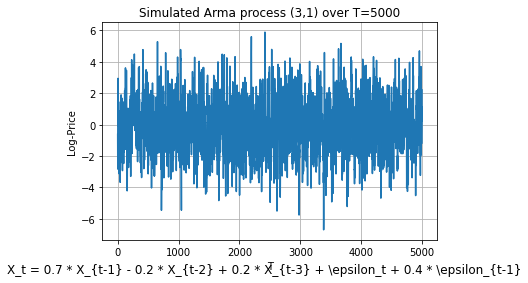

In [25]:
plt.plot(Arma_s1_long)
plt.grid()
plt.title("Simulated Arma process (3,1) over T=5000")
txt="X_t = 0.7 * X_{t-1} - 0.2 * X_{t-2} + 0.2 * X_{t-3} + \epsilon_t + 0.4 * \epsilon_{t-1}"
plt.xlabel("T")
plt.ylabel("Log-Price")
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

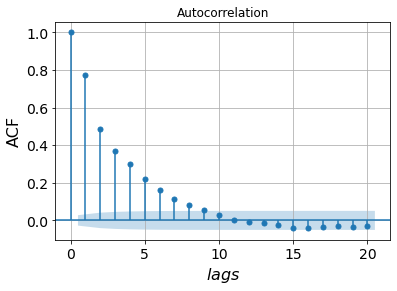

In [26]:
sm.graphics.tsa.plot_acf(Arma_s1_long,lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()
plt.show()

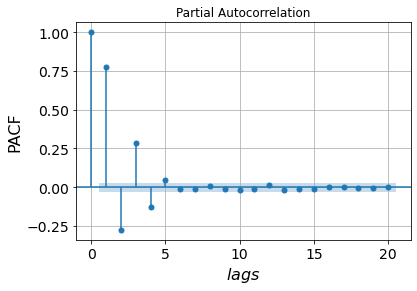

In [27]:
sm.graphics.tsa.plot_pacf(Arma_s1_long,lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('PACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()
plt.show()

On peut voir qu'il y a moins de termes stat significatifs

# Attention ici dans ft= Arma(mettre le processus qu'on étudie, ...)

In [32]:
M = {}
models_ARMA_params=[(4,0,'n'),(4,0,'nc'),
          (1,1,'n'),(1,1,'nc'),
          (2,1,'n'),(2,1,'nc'),
          (1,2,'n'),(1,2,'nc'),
          (2,2,'n'),(2,2,'nc'),
          (3,1,'n'),(3,1,'nc')] 
for p,q,tend in models_ARMA_params:
    try:
        #fit an arma (for now without trend)
        ft = ARMA(Arma_s1_long,order=(p,q)).fit(method='mle',trend=tend)
        M[p,q,tend] = ft
    except ValueError:
        print(p,q,'Maybe not stationary')


d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
4 0 Maybe not stationary
1 1 Maybe not stationary
d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\statsmode

In [33]:
AIC = pd.DataFrame( [(m,ft.aic,ft.bic) for m,ft in M.items()],columns=['model','AIC','BIC'] ) # colum 1 = param column2 = aic

AIC = AIC.assign(dAIC=(AIC.AIC-AIC.AIC.min()))
AIC = AIC.assign(dBIC=(AIC.BIC-AIC.BIC.min()))

AIC

,model,AIC,BIC,dAIC,dBIC
0,"(4, 0, nc)",14048.449768,14081.035734,9.507855,9.507855
1,"(1, 1, nc)",14131.902483,14151.454063,92.960570,79.926183
2,"(2, 1, nc)",14116.389347,14142.458120,77.447433,70.930240
3,"(1, 2, nc)",14096.068312,14122.137085,57.126399,50.609205
4,"(2, 2, nc)",14078.231170,14110.817136,39.289257,39.289257
5,"(3, 1, nc)",14038.941914,14071.527879,0.000000,0.000000


In [198]:
# on décelle que 3.1 est très bien quand on a plus d'obs 

In [199]:
index_interet=[5,4,0]## 1,2 c'est xemple mais grace à AIC on met les indices des modèles qui nous intéresse
for i in index_interet:
    p,q,t = AIC.model[i]# p , q ,trend
    print(M[p,q,t].summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 5000
Model:                     ARMA(3, 1)   Log Likelihood               -7029.136
Method:                           mle   S.D. of innovations              0.987
Date:                Thu, 13 May 2021   AIC                          14068.272
Time:                        16:47:35   BIC                          14100.858
Sample:                             0   HQIC                         14079.693
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.6882      0.037     18.731      0.000       0.616       0.760
ar.L2.y       -0.1868      0.041     -4.606      0.000      -0.266      -0.107
ar.L3.y        0.1821      0.020      9.311      0.0

(2,2) pas bon au niveau des intervalles de confiance et des p-values 

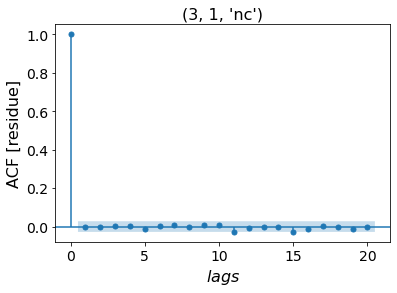

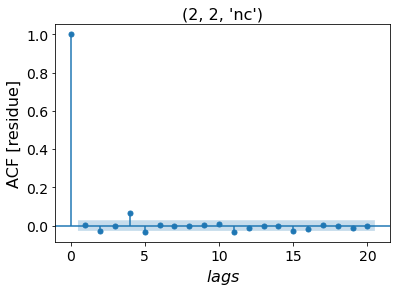

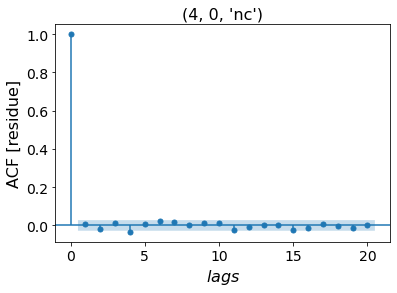

In [200]:
rs = {params: M[params].resid for params in AIC.model[index_interet]}
for params,r in rs.items():
    sm.graphics.tsa.plot_acf(r, lags=20)
    plt.xlabel(r'$lags$',fontsize=16)
    plt.ylabel('ACF [residue]',fontsize=16)
    plt.tick_params(labelsize=14)
    plt.title(params,fontsize=16)
    plt.show()

In [201]:
# rappel on s'attend à avoir juste un pic en lag=0 et sinon rien (cas idéal) ou rien de stat signifiant
# entre 3,1 et 4,0 qui va être le meilleur ? 

In [202]:
Qtest_long = []  
for (p,q,trend),r in rs.items():
    pvalue = sm.stats.acorr_ljungbox(r,lags=[p+q+1],model_df=p+q,return_df=True)['lb_pvalue'][p+q+1]
    Qtest_long.append(( (p,q,trend), pvalue))
Qtest_long = pd.DataFrame( Qtest_long, columns=['model','residue pvalues'] )

In [203]:
Qtest_long ## attention ici (2,2) a été évincé car ses intervalle ne sont pas bon 

,model,residue pvalues
0,"(3, 1, nc)",3.744335e-01
1,"(2, 2, nc)",1.184867e-08
2,"(4, 0, nc)",3.124742e-03


In [204]:
# les deux sont ok 